In [258]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading
df = pd.read_excel('/Users/ilkekanil/Desktop/Mall_Customers.xls')



In [259]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [260]:
df.describe() #to get information about the numeric data from my dataset

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [261]:
df.isnull()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [262]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [263]:
df.shape #checking the number of rows and columns

(200, 5)

In [264]:
df.info() #checking for the  Dtypes in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


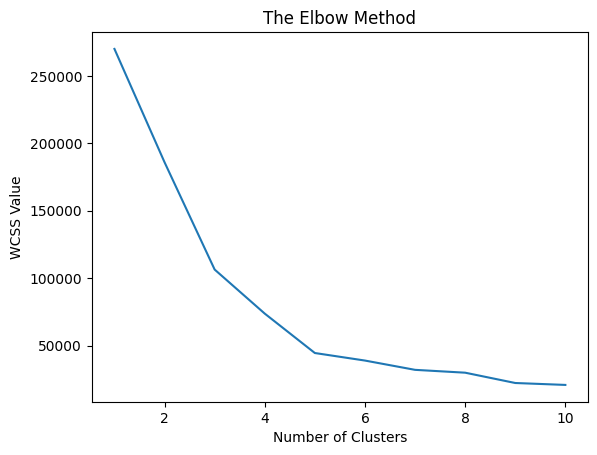

In [265]:
#Elbow Method
# take the relevant columns
data_1 = df[['Annual Income (k$)', 'Spending Score (1-100)']].values


from sklearn.cluster import KMeans
wcss=[] # within cluster sum of square
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data_1) #Fits K-Means model to the data.
    wcss.append(kmeans.inertia_) #finding wcss value

plt.plot(range(1,11),wcss) 
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Value')
plt.show()

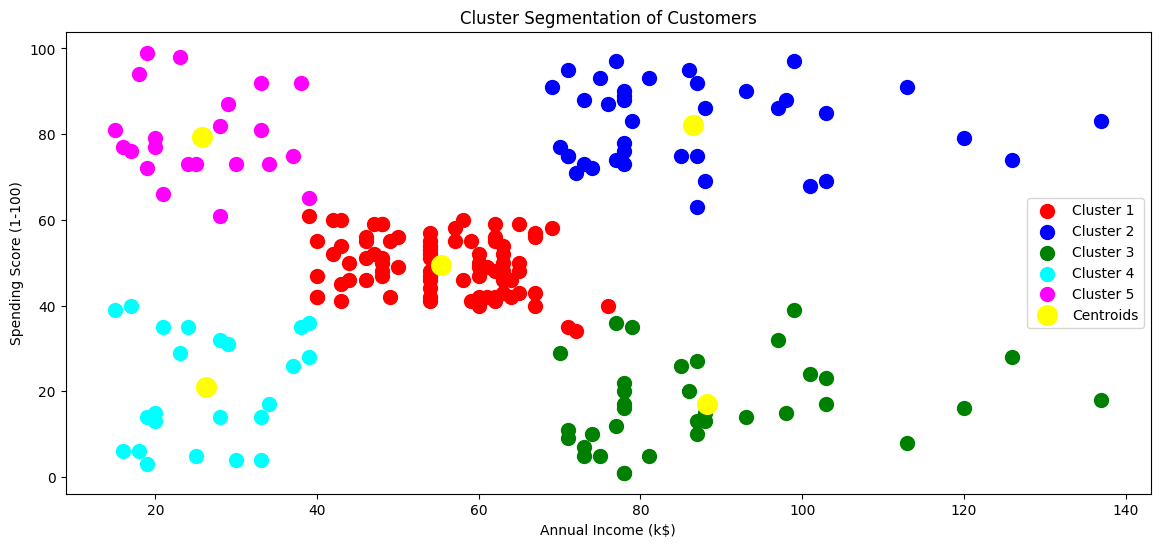

In [266]:
# 5 as the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(data_1)  # Fits K-Means model and cluster for each data point

# Plotting the clusters
fig, ax = plt.subplots(figsize=(14, 6))
ax.scatter(data_1[y_kmeans == 0, 0], data_1[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
ax.scatter(data_1[y_kmeans == 1, 0], data_1[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
ax.scatter(data_1[y_kmeans == 2, 0], data_1[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
ax.scatter(data_1[y_kmeans == 3, 0], data_1[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
ax.scatter(data_1[y_kmeans == 4, 0], data_1[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plotting the centroids
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label='Centroids')  # mean points

plt.title('Cluster Segmentation of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

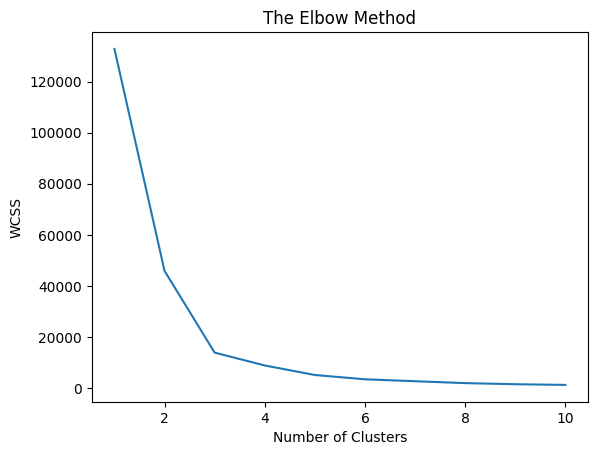

In [267]:
from sklearn.preprocessing import LabelEncoder
# make the Genre column numeric 
labelencoder = LabelEncoder()

df['Genre'] = labelencoder.fit_transform(df['Genre'])

# take the relevant columns
data_2 = df[['Genre', 'Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss=[] # within cluster sum of square
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data_2) #Fits K-Means model
    wcss.append(kmeans.inertia_) #find the wcss value

plt.plot(range(1,11),wcss) 
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

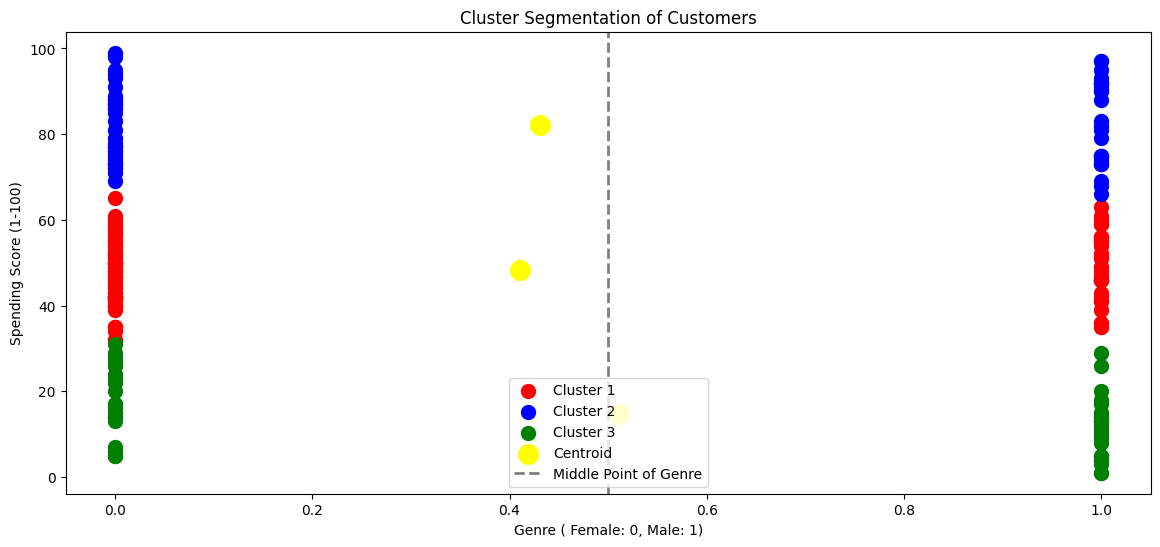

In [268]:
# K-Means 
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(data_2)

# plotting
fig, ax = plt.subplots(figsize=(14, 6))
ax.scatter(data_2[y_kmeans == 0, 0], data_2[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
ax.scatter(data_2[y_kmeans == 1, 0], data_2[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
ax.scatter(data_2[y_kmeans == 2, 0], data_2[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')



ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label='Centroid')  # center points
plt.axvline(x=0.5, color='gray', linestyle='--', linewidth=2, label='Middle Point of Genre')  # show the middle of x-axis (0.5)
plt.title('Cluster Segmentation of Customers')
plt.xlabel('Genre ( Female: 0, Male: 1)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


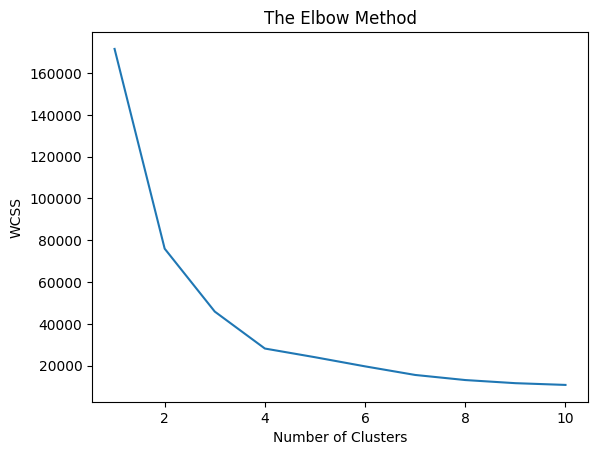

In [269]:
# take the relevant columns
data_3 = df[['Age', 'Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss=[] # within cluster sum of square
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data_3) #Fits K-Means model
    wcss.append(kmeans.inertia_) #find the wcss value

plt.plot(range(1,11),wcss) 
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

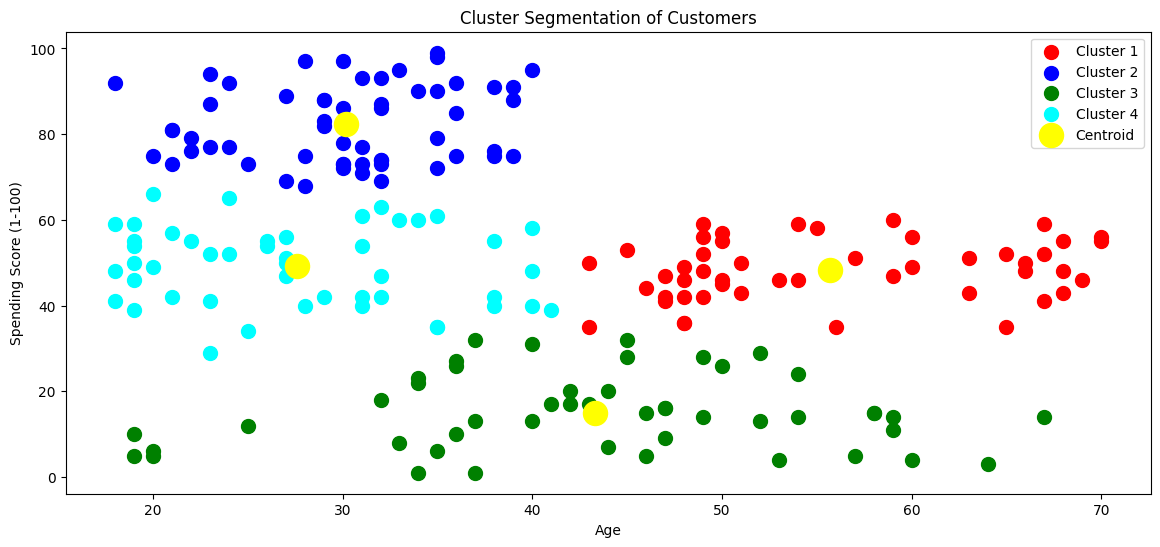

In [270]:
# KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(data_3)

#plotting
fig, ax = plt.subplots(figsize=(14, 6))
ax.scatter(data_3[y_kmeans == 0, 0], data_3[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
ax.scatter(data_3[y_kmeans == 1, 0], data_3[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
ax.scatter(data_3[y_kmeans == 2, 0], data_3[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
ax.scatter(data_3[y_kmeans == 3, 0], data_3[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')


ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroid') # Mean points
plt.title('Cluster Segmentation of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()